In [1]:
#Imports Necessary Libraries import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
#Data Visualization - Distributions

In [3]:
project_df = pd.read_csv('glassdoor_reviews.csv')
project_df.head()

,Unnamed: 0,column_label,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,...,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,use
0,1,1,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1,1.0,1.0,...,1.0,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...,NaN
1,2,1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4,4.0,5.0,...,3.0,4.0,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid,NaN
2,3,1,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",4,5.0,4.0,...,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation,NaN
3,4,1,Sotheby-s,2021-05-22,Anonymous Employee,Current Employee,Hong Kong,3,2.0,2.0,...,3.0,2.0,3.0,o,o,o,Review,"Exposure to artworks, great team of specialists","Work life balance, company culture",NaN
4,5,1,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4,4.0,4.0,...,3.0,3.0,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload,NaN


In [ ]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           838566 non-null  int64  
 1   column_label         838566 non-null  int64  
 2   firm                 838566 non-null  object 
 3   date_review          838566 non-null  object 
 4   job_title            838566 non-null  object 
 5   current              838566 non-null  object 
 6   location             541228 non-null  object 
 7   overall_rating       838566 non-null  int64  
 8   work_life_balance    688672 non-null  float64
 9   culture_values       647193 non-null  float64
 10  diversity_inclusion  136066 non-null  float64
 11  career_opp           691065 non-null  float64
 12  comp_benefits        688484 non-null  float64
 13  senior_mgmt          682690 non-null  float64
 14  recommend            838566 non-null  object 
 15  ceo_approv       

In [ ]:
#Drops columns with a lot of missing data for distribution analysis 
project_df2 = project_df[[column for column in project_df if project_df[column].count() / len(project_df) >= 0.3]]
del project_df2["Unnamed: 0"]
del project_df2["column_label"]
print("List of dropped columns:", end=" ")
for c in project_df.columns:
    if c not in project_df2.columns:
        print(c, end=", ")
print('\n')
project_df = project_df2

List of dropped columns: Unnamed: 0, column_label, diversity_inclusion, use, 



count    838566.000000
mean          3.655956
std           1.174684
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: overall_rating, dtype: float64


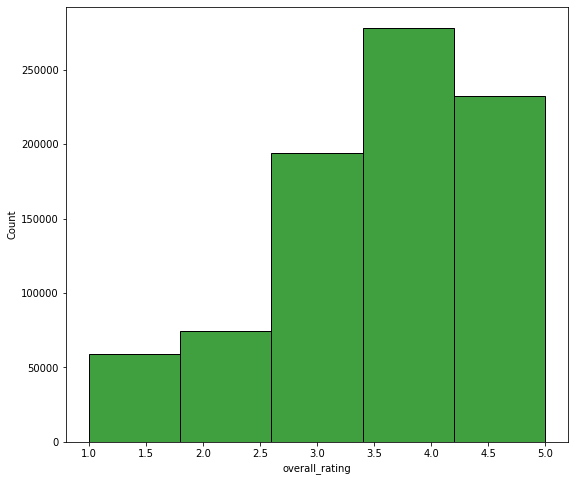

In [ ]:
#Plots the distribution of the proposed label: overall rating 
print(project_df['overall_rating'].describe())
plt.figure(figsize=(9, 8))

sns.histplot(project_df['overall_rating'], color='g', bins=5);

In [ ]:
#Identifies the continuous variables (numerical)
project_df_num = project_df.select_dtypes(include = 'number')
project_df_num.head()

,overall_rating,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt
0,1,1.0,1.0,1.0,2.0,1.0
1,4,4.0,5.0,3.0,4.0,4.0
2,4,5.0,4.0,5.0,4.0,5.0
3,3,2.0,2.0,3.0,2.0,3.0
4,4,4.0,4.0,3.0,3.0,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3aba44b6d0>,
      dtype=object)

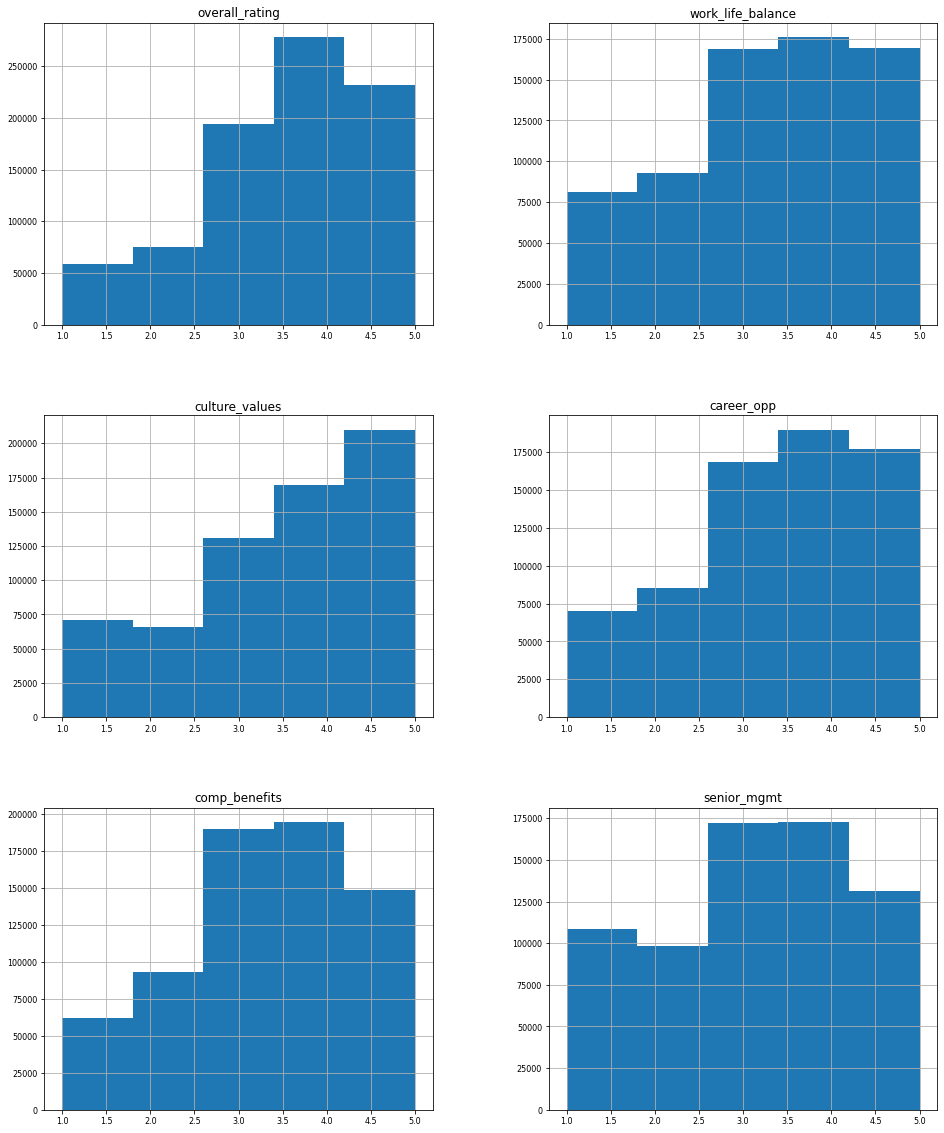

In [ ]:
#Plots distributions of each of the numerical vaiables 
project_df_num.hist(figsize=(16, 20), bins=5, xlabelsize=8, ylabelsize=8)

In [ ]:
#Identifies the non-numerical features 
project_df_not_num = project_df.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(project_df_not_num.columns), project_df_not_num.columns.tolist()))

There is 11 non numerical features including:
['firm', 'date_review', 'job_title', 'current', 'location', 'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons']


In [ ]:
#Data Visualization - Correlation

In [ ]:
#Creates a new column order by moving the label to the last column 
new_col_order = [col for col in project_df.columns if col != 'overall_rating'] + ['overall_rating']
project_df = project_df[new_col_order]
project_df.head()

,firm,date_review,job_title,current,location,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,overall_rating
0,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1.0,1.0,1.0,2.0,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...,1
1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4.0,5.0,3.0,4.0,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid,4
2,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",5.0,4.0,5.0,4.0,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation,4
3,Sotheby-s,2021-05-22,Anonymous Employee,Current Employee,Hong Kong,2.0,2.0,3.0,2.0,3.0,o,o,o,Review,"Exposure to artworks, great team of specialists","Work life balance, company culture",3
4,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4.0,4.0,3.0,3.0,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload,4


In [ ]:
#Identifies strong correlations with the label 
project_df_corr = project_df.corr()['overall_rating'][:-1]
golden_features_list = project_df_corr[abs(project_df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Overall Rating:\n{}".format(len(golden_features_list), golden_features_list))

There are 5 strongly correlated values with Overall Rating:
culture_values       0.766156
senior_mgmt          0.751829
career_opp           0.715081
comp_benefits        0.609950
work_life_balance    0.563333
Name: overall_rating, dtype: float64


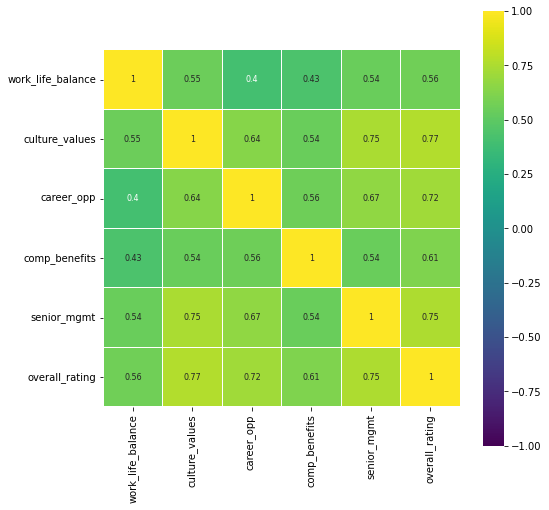

In [ ]:
#Creates a heatmap for feature correlation analysis 
project_df_corr = project_df.corr()
plt.figure(figsize=(8, 8))

sns.heatmap(project_df_corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

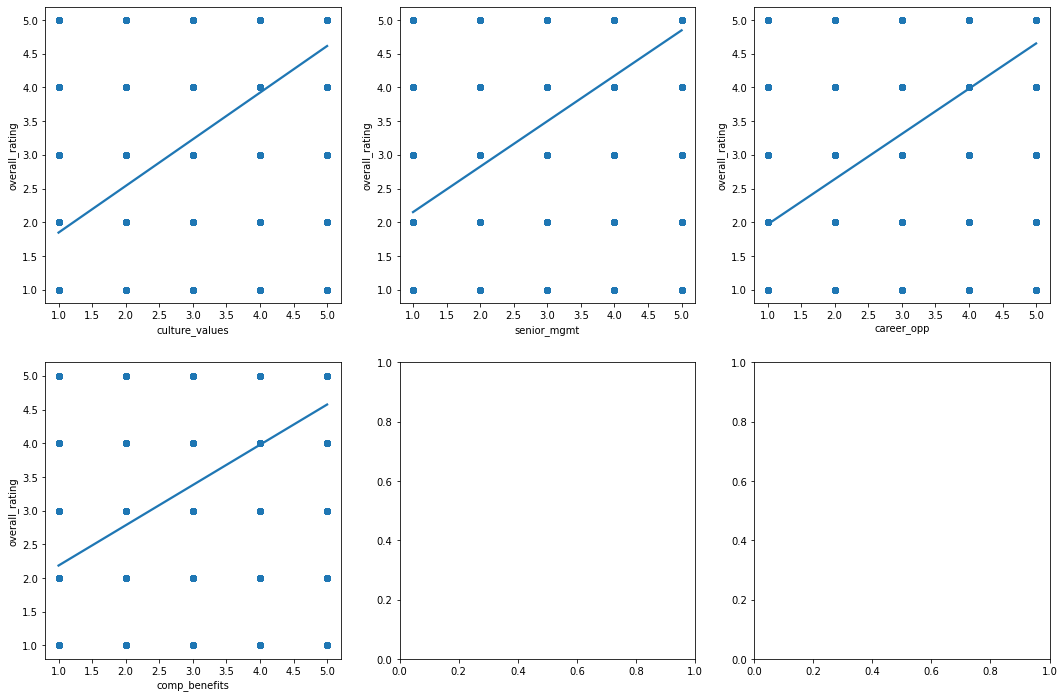

In [ ]:
fig, ax = plt.subplots(round(len(golden_features_list) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(golden_features_list) - 1:
        sns.regplot(x=golden_features_list.index[i],y='overall_rating', data=project_df, ax=ax)

In [ ]:
#Data Preprocessing - Data Cleaning

In [4]:
project_df = pd.read_csv('glassdoor_reviews.csv')
y = project_df.overall_rating
#Drops the label for processing/feature engineering
project_df.drop(['overall_rating'], axis=1, inplace=True)

In [5]:
#Finding the Missing Data
project_df_na = (project_df.isnull().sum() / len(project_df)) * 100
project_df_na = project_df_na.drop(project_df_na[project_df_na == 0].index).sort_values(ascending=False)[:30]
project_missing_data = pd.DataFrame({'Missing Ratio' :project_df_na})
project_missing_data.head(20)

,Missing Ratio
use,100.000000
diversity_inclusion,83.773967
location,35.457913
culture_values,22.821459
senior_mgmt,18.588400
comp_benefits,17.897458
work_life_balance,17.875039
career_opp,17.589671
headline,0.264618
cons,0.000954


Text(0.5, 1.0, 'Percent missing data by feature')

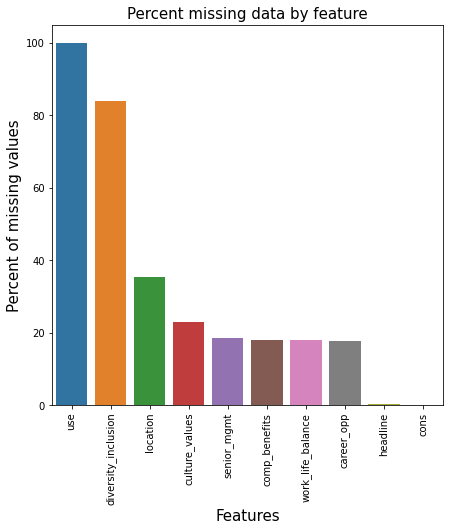

In [6]:
#Plots the percentage of missing data for each feature 
f, ax = plt.subplots(figsize=(7, 7))
plt.xticks(rotation='90')
sns.barplot(x=project_df_na.index, y=project_df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [7]:
#Imputes missing values with the median value for continuous features
#Imputes missing values with None for categorical features
#Deletes columns with high percentages of missing values 

In [8]:
del project_df["use"]

In [9]:
del project_df["diversity_inclusion"]

In [10]:
project_df["location"] = project_df["location"].fillna("None")

In [11]:
project_df["culture_values"].fillna(project_df["culture_values"].median(), inplace=True)

In [12]:
project_df["senior_mgmt"].fillna(project_df["senior_mgmt"].median(), inplace=True)

In [13]:
project_df["comp_benefits"].fillna(project_df["comp_benefits"].median(), inplace=True)

In [14]:
project_df["work_life_balance"].fillna(project_df["work_life_balance"].median(), inplace=True)

In [15]:
project_df["career_opp"].fillna(project_df["career_opp"].median(), inplace=True)

In [16]:
project_df["headline"] = project_df["headline"].fillna("None")

In [17]:
project_df["cons"] = project_df["cons"].fillna("None")

In [18]:
#Checks if there is still any missing data
project_df_na = (project_df.isnull().sum() / len(project_df)) * 100
project_df_na = project_df_na.drop(project_df_na[project_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :project_df_na})
missing_data.head()

,Missing Ratio


In [19]:
#Data Preprocessing - Feature Engineering

#Turns recommend, CEO approval, and outlok into numerical features as shown below 
# recommend, ceo_approval, outlook: v: 3, r: 2, o: 1, x: 0
temp_dict = {'v': 3.0, 'r': 2.0, 'o': 1.0, 'x': 0.0}
temp_dict3 = {'v': 2.0, 'o': 1.0, 'x': 0.0}

rec_numeric = []
ceo_approv_numeric = []
outlook_numeric = []

for row in project_df.iterrows():
  rec_numeric.append(temp_dict3[row[1]['recommend']])  
  ceo_approv_numeric.append(temp_dict[row[1]['ceo_approv']])  
  outlook_numeric.append(temp_dict[row[1]['outlook']])  



project_df['recommend_numeric'] = rec_numeric
project_df['ceo_approv_numeric'] = ceo_approv_numeric
project_df['outlook_numeric'] = outlook_numeric

In [ ]:
project_df

,Unnamed: 0,column_label,firm,date_review,job_title,current,location,work_life_balance,culture_values,career_opp,...,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,recommend_numeric,ceo_approv_numeric,outlook_numeric
0,1,1,Sotheby-s,2021-05-25,Financial Analyst,"Former Employee, more than 1 year","New York, NY",1.0,1.0,1.0,...,1.0,x,r,x,Don't do it,People in leadership roles have been there for...,Pressure to do whatever the leaders want\r\nNo...,0.0,2.0,0.0
1,2,1,Sotheby-s,2021-05-25,Administrator,Former Employee,Hong Kong,4.0,5.0,3.0,...,4.0,o,o,o,international auction house,"great exposure, respectful environment and bea...",OT during peak seasons and often underpaid,1.0,1.0,1.0
2,3,1,Sotheby-s,2021-05-24,Client Services Representative,"Former Employee, more than 1 year","London, England, England",5.0,4.0,5.0,...,5.0,v,v,v,"Fast-paced, difficult and rewarding","Good team, support and training",High-stress with relatively low conpensation,2.0,3.0,3.0
3,4,1,Sotheby-s,2021-05-22,Anonymous Employee,Current Employee,Hong Kong,2.0,2.0,3.0,...,3.0,o,o,o,Review,"Exposure to artworks, great team of specialists","Work life balance, company culture",1.0,1.0,1.0
4,5,1,Sotheby-s,2021-05-15,Administrator,"Current Employee, less than 1 year","London, England, England",4.0,4.0,3.0,...,3.0,v,r,v,Fun job and nice people but huge workload and ...,"Fantastic art, nice enthusiastic people and a ...",Very low pay and huge workload,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838561,838562,71,Department-for-Work-And-Pensions,2010-09-03,Analyst,Former Employee,"London, England, England",4.0,4.0,2.0,...,3.0,o,v,o,DWP Analyst Position,Workforce consists of highly motivated and int...,Often too relaxed and many lack much drive on ...,1.0,3.0,1.0
838562,838563,71,Department-for-Work-And-Pensions,2010-04-25,Assistant Economist,Current Employee,"London, England, England",5.0,4.0,5.0,...,2.0,o,r,o,Stress free job with very strong work life bal...,Only 36 hours a week.\r\nLots of opportunities...,Pay is OK at first but with little growth or b...,1.0,2.0,1.0
838563,838564,71,Department-for-Work-And-Pensions,2009-11-08,Private Secretary,Current Employee,"London, England, England",4.0,4.0,4.0,...,3.0,v,v,o,Inner workings - interesting,"Big department, with lots of opportunities to ...",Long hours tend to be unrewarded when they hap...,2.0,3.0,1.0
838564,838565,71,Department-for-Work-And-Pensions,2009-07-16,DASO Jobcentre,Current Employee,"Newport, Newport, Wales, Wales",5.0,4.0,3.0,...,2.0,v,x,o,Band B - AO,Safe place to work when in recession. People ...,90% of the time its only a very short contract...,2.0,0.0,1.0


In [20]:
# NLP Aspect would be too complex
project_df['firm'].describe()

count     838566
unique       428
top          IBM
freq       60436
Name: firm, dtype: object

In [21]:
#Verification that the feature engineering worked as expected

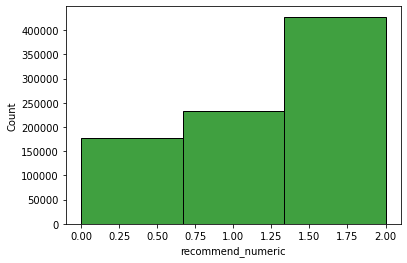

In [22]:
sns.histplot(project_df['recommend_numeric'], color='g', bins=3)

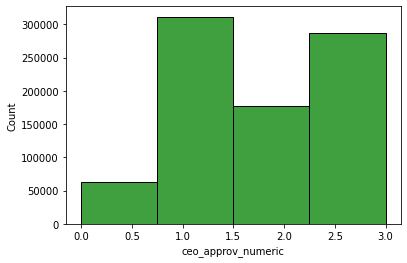

In [23]:
sns.histplot(project_df['ceo_approv_numeric'], color='g', bins=4);

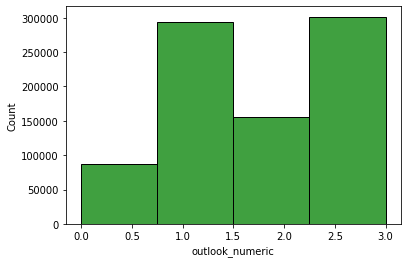

In [24]:
sns.histplot(project_df['outlook_numeric'], color='g', bins=4);

In [25]:
#Feature Selction

X = project_df[['work_life_balance', 'culture_values', 'career_opp',
                'comp_benefits', 'senior_mgmt', 'ceo_approv_numeric', 'recommend_numeric', 'outlook_numeric']]


In [ ]:
X

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,ceo_approv_numeric,recommend_numeric,outlook_numeric
0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0
1,4.0,5.0,3.0,4.0,4.0,1.0,1.0,1.0
2,5.0,4.0,5.0,4.0,5.0,3.0,2.0,3.0
3,2.0,2.0,3.0,2.0,3.0,1.0,1.0,1.0
4,4.0,4.0,3.0,3.0,3.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...
838561,4.0,4.0,2.0,2.0,3.0,3.0,1.0,1.0
838562,5.0,4.0,5.0,1.0,2.0,2.0,1.0,1.0
838563,4.0,4.0,4.0,2.0,3.0,3.0,2.0,1.0
838564,5.0,4.0,3.0,3.0,2.0,0.0,2.0,1.0


In [26]:
y

0         1
1         4
2         4
3         3
4         4
         ..
838561    2
838562    3
838563    4
838564    4
838565    2
Name: overall_rating, Length: 838566, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#Baseline Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
pred = model.predict(X_test)
train_pred = model.predict(X_train)



# Baseline: 0.2 by random chance so 0.55 is actually decent

print('Training Accuracy Score: ', accuracy_score(y_train, train_pred))
print('Training F1 Score: ', f1_score(y_train, train_pred, average='weighted'))


print('Testing Accuracy Score: ', accuracy_score(y_test, pred))
print('Testing F1 Score: ', f1_score(y_test, pred, average='weighted'))


Training Accuracy Score:  0.548393684449029
Training F1 Score:  0.5241021999383288
Testing Accuracy Score:  0.5489464206923691
Testing F1 Score:  0.5248825684147252


In [27]:
# senior_mgmt has strong correlations with ceo_approval and culture_values, so we will remove it as a feature
X.corr()

,work_life_balance,culture_values,career_opp,comp_benefits,senior_mgmt,ceo_approv_numeric,recommend_numeric,outlook_numeric
work_life_balance,1.000000,0.545670,0.415344,0.391664,0.512961,0.173484,0.392197,0.213914
culture_values,0.545670,1.000000,0.617620,0.496804,0.704626,0.306665,0.562605,0.368453
career_opp,0.415344,0.617620,1.000000,0.520092,0.636450,0.249942,0.509847,0.353095
comp_benefits,0.391664,0.496804,0.520092,1.000000,0.539798,0.327364,0.459481,0.378232
senior_mgmt,0.512961,0.704626,0.636450,0.539798,1.000000,0.381093,0.589150,0.445071
ceo_approv_numeric,0.173484,0.306665,0.249942,0.327364,0.381093,1.000000,0.460642,0.544539
recommend_numeric,0.392197,0.562605,0.509847,0.459481,0.589150,0.460642,1.000000,0.568163
outlook_numeric,0.213914,0.368453,0.353095,0.378232,0.445071,0.544539,0.568163,1.000000


In [31]:
#project_df.drop(['senior_mgmt'], axis=1, inplace=True)
# Slightly improved model with fewer collinear features and more suitable solver

model = LogisticRegression(multi_class='multinomial',solver='sag')
model.fit(X_train, y_train)
pred = model.predict(X_test)
train_pred = model.predict(X_train)



# Baseline: 0.2 by random chance so 0.585 is good

print('Training Accuracy Score: ', accuracy_score(y_train, train_pred))
print('Training F1 Score: ', f1_score(y_train, train_pred, average='weighted'))


print('Testing Accuracy Score: ', accuracy_score(y_test, pred))
print('Testing F1 Score: ', f1_score(y_test, pred, average='weighted'))

Training Accuracy Score:  0.5860949956175132
Training F1 Score:  0.5804457031208463
Testing Accuracy Score:  0.5856636893759615
Testing F1 Score:  0.5801484994990115


In [32]:
model.classes_

array([1, 2, 3, 4, 5])

In [ ]:
#Splits the data into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Feature Normalization 
from sklearn.preprocessing import StandardScaler
modeling_feature_normalizer = StandardScaler()
X_train_normalized = modeling_feature_normalizer.fit_transform(X_train)

In [ ]:
#XG Boost Algorithm

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)

#X_test_normalized = modeling_feature_normalizer.fit_transform(X_test)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# print('Training Accuracy Score: ', accuracy_score(y_train, y_train_pred))
# print('Training F1 Score: ', f1_score(y_train, y_train_pred, average='weighted'))

print('Training Accuracy Score: ', accuracy_score(y_train, y_train_pred))
print('Training F1 Score: ', f1_score(y_train, y_train_pred, average='weighted'))

print('Testing Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Testing F1 Score: ', f1_score(y_test, y_pred, average='weighted'))
print('Testing Recall Score: ', recall_score(y_test, y_pred,  average='weighted'))
print('Testing Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

Training Accuracy Score:  0.6076198625032049
Training F1 Score:  0.6055553646960531
Testing Accuracy Score:  0.6069737767866725
Testing F1 Score:  0.604824768615506
Testing Recall Score:  0.6069737767866725
Testing Precision Score:  0.6294388732183926


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyper Parameter Optimization
# Found optimal hyperparameters using RandomizedSearchCV - ran externally on a AWS EC2 cluster
# Accuracy seems to max out at around 0.605 
# Next steps: explore different classifier types - 'dart', 'xglinear' etc. as well as more hyperparameter options
# Further optimizations: Run RandomizedSearchCV on a sample of the dataset instead of the whole thing to save time.
# TODO: Experiment with removing more features, and normalizing the most skewed ones


clf = XGBClassifier(max_depth=5, learning_rate=0.2, n_estimators=80, reg_lambda=0.3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

print('Training Accuracy Score: ', accuracy_score(y_train, y_train_pred))
print('Training F1 Score: ', f1_score(y_train, y_train_pred, average='weighted'))


print('Testing Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Testing F1 Score: ', f1_score(y_test, y_pred, average='weighted'))
print('Testing Recall Score: ', recall_score(y_test, y_pred,  average='weighted'))
print('Testing Precision Score: ', precision_score(y_test, y_pred, average='weighted'))

Training Accuracy Score:  0.613795591277957
Training F1 Score:  0.6129563948395174
Testing Accuracy Score:  0.610879234887964
Testing F1 Score:  0.609946496140654
Testing Recall Score:  0.610879234887964
Testing Precision Score:  0.6310494587626773


In [ ]:
#Feature Importances
clf.feature_importances_

array([0.04158537, 0.31338054, 0.18610427, 0.05401601, 0.01468488,
       0.36809212, 0.02213687], dtype=float32)

In [ ]:
X_train.columns

Index(['work_life_balance', 'culture_values', 'career_opp', 'comp_benefits',
       'ceo_approv_numeric', 'recommend_numeric', 'outlook_numeric'],
      dtype='object')

Text(0.5, 1.0, 'Feature Importances in XGBoost Classification of Overall Job Approval')

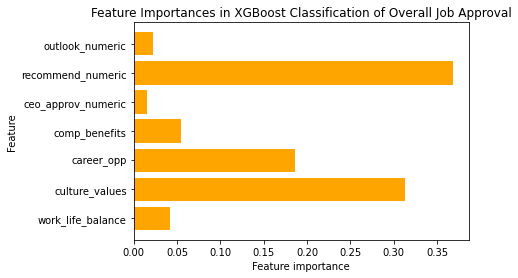

In [ ]:
#Plotting the Feature Importances
plt.barh(X_train.columns, list(clf.feature_importances_), color='orange')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importances in XGBoost Classification of Overall Job Approval")

In [ ]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier


# Baseline Neural Network
mlp_classifier  = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train, y_train)

y_pred = mlp_classifier.predict(X_test)
y_train_pred = clf.predict(X_train)

print('Training Accuracy Score: ', accuracy_score(y_train, y_train_pred))
print('Training F1 Score: ', f1_score(y_train, y_train_pred, average='weighted'))


print('Testing Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Testing F1 Score: ', f1_score(y_test, y_pred, average='weighted'))
print('Testing Recall Score: ', recall_score(y_test, y_pred,  average='weighted'))
print('Testing Precision Score: ', precision_score(y_test, y_pred, average='weighted'))


Training Accuracy Score:  0.6043851699033468
Training F1 Score:  0.603265885163487
Testing Accuracy Score:  0.6007488939504156
Testing F1 Score:  0.6002469161750815
Testing Recall Score:  0.6007488939504156
Testing Precision Score:  0.6179291161778434


In [ ]:
# Neural Network with Tuned Solver
mlp_classifier  = MLPClassifier(random_state=42, solver='sgd')
mlp_classifier.fit(X_train, y_train)

y_pred = mlp_classifier.predict(X_test)
y_train_pred = clf.predict(X_train)

print('Training Accuracy Score: ', accuracy_score(y_train, y_train_pred))
print('Training F1 Score: ', f1_score(y_train, y_train_pred, average='weighted'))


print('Testing Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Testing F1 Score: ', f1_score(y_test, y_pred, average='weighted'))


Training Accuracy Score:  0.613795591277957
Training F1 Score:  0.6129563948395174
Testing Accuracy Score:  0.6088221615369022
Testing F1 Score:  0.6089455207260847
